In [1]:
# Initial imports
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score 

data = (r'C:\Users\clava\data_miners\visualization\viz_df.csv')
model_df = pd.read_csv(data)

In [2]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# merge duplicate zip code rows
#model_df = model_df.groupby(['ZIP_CODE'], as_index=False)['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST',
#                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
#                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#                     'REG_COUNTS'].sum()

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,State_Code,Latitude,Longitude,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,,,
03266,WI,43.045323,-88.041306,0.0,2.0,0.0,0.0,1.0,0.0,851.0,54904.0,0
07001,NJ,40.573827,-74.290584,0.0,1.0,0.0,0.0,1.0,0.0,5022.0,69849.0,173
07003,NJ,326.418030,-593.539921,0.0,12.0,5.0,4.0,1.0,3.0,18577.0,78034.0,5
07003,NJ,326.418030,-593.539921,0.0,12.0,5.0,4.0,1.0,3.0,18577.0,78034.0,795
07004,NJ,122.643406,-222.838226,0.0,6.0,3.0,0.0,1.0,2.0,2621.0,122063.0,1


In [3]:
model_df['EV_TOTAL'] = model_df.iloc[:, -9:-7].sum(axis=1)
model_df = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
                     'REG_COUNTS']]
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,0.0,2.0,0.0,2.0,0.0,1.0,0.0,851.0,54904.0,0
07001,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5022.0,69849.0,173
07003,0.0,12.0,5.0,12.0,4.0,1.0,3.0,18577.0,78034.0,5
07003,0.0,12.0,5.0,12.0,4.0,1.0,3.0,18577.0,78034.0,795
07004,0.0,6.0,3.0,6.0,0.0,1.0,2.0,2621.0,122063.0,1
...,...,...,...,...,...,...,...,...,...,...
99352,0.0,13.0,3.0,13.0,1.0,1.0,4.0,12877.0,81410.0,3411
99354,36.0,48.0,0.0,84.0,0.0,45.0,1.0,9175.0,73369.0,2082
99361,0.0,1.0,0.0,1.0,0.0,0.0,1.0,750.0,69118.0,100


In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2939 entries, 03266 to 99403
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2939 non-null   float64
 1   EV_LEVEL_2                  2939 non-null   float64
 2   EV_FAST                     2939 non-null   float64
 3   EV_TOTAL                    2939 non-null   float64
 4   NETWORK_TYPE_ChargePoint    2939 non-null   float64
 5   NETWORK_TYPE_Non-Networked  2939 non-null   float64
 6   NETWORK_TYPE_Other-Network  2939 non-null   float64
 7   TOTAL_HOUSEHOLDS            2939 non-null   float64
 8   MEDIAN_INCOME               2939 non-null   float64
 9   REG_COUNTS                  2939 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 252.6+ KB


In [5]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,0.297040,8.893161,1.830895,9.190201,2.132698,0.711807,1.624702,9179.279347,75481.937053,817.628105
std,2.195646,14.681442,4.006332,15.049076,4.899058,1.430593,2.653013,7007.952224,31314.911816,1800.180990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3456.500000,53477.500000,25.000000
50%,0.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,8163.000000,68109.000000,196.000000
75%,0.000000,9.500000,1.000000,10.000000,2.000000,1.000000,2.000000,13140.500000,91850.500000,818.500000
max,48.000000,227.000000,38.000000,227.000000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show(close=None, block=None)>

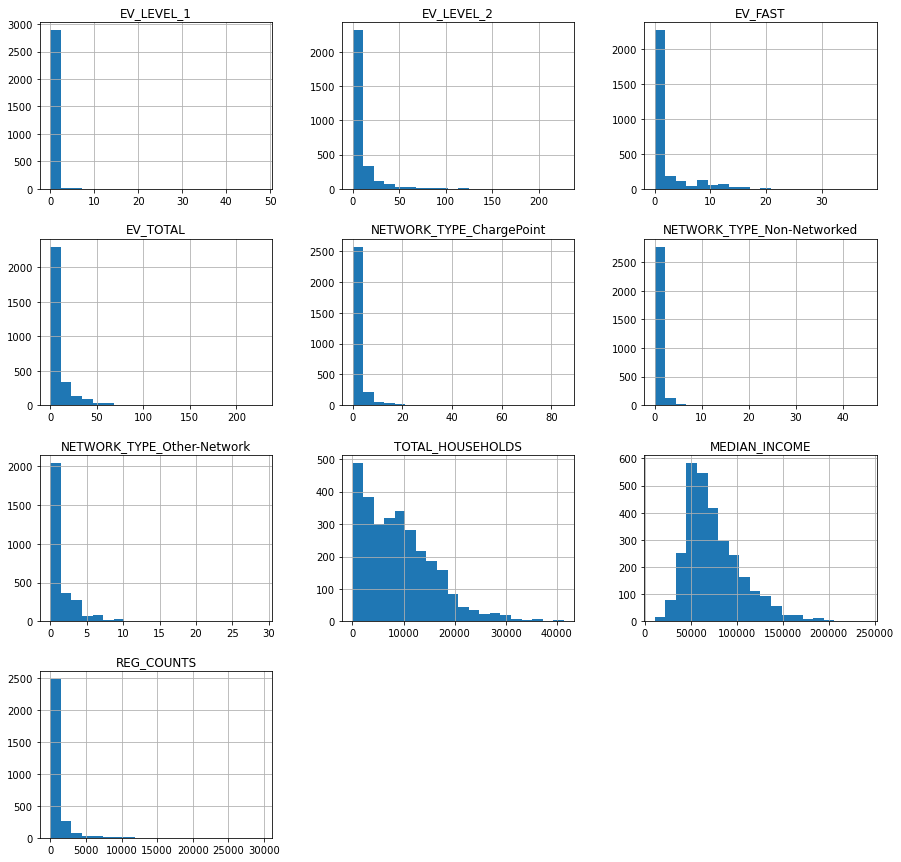

In [6]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

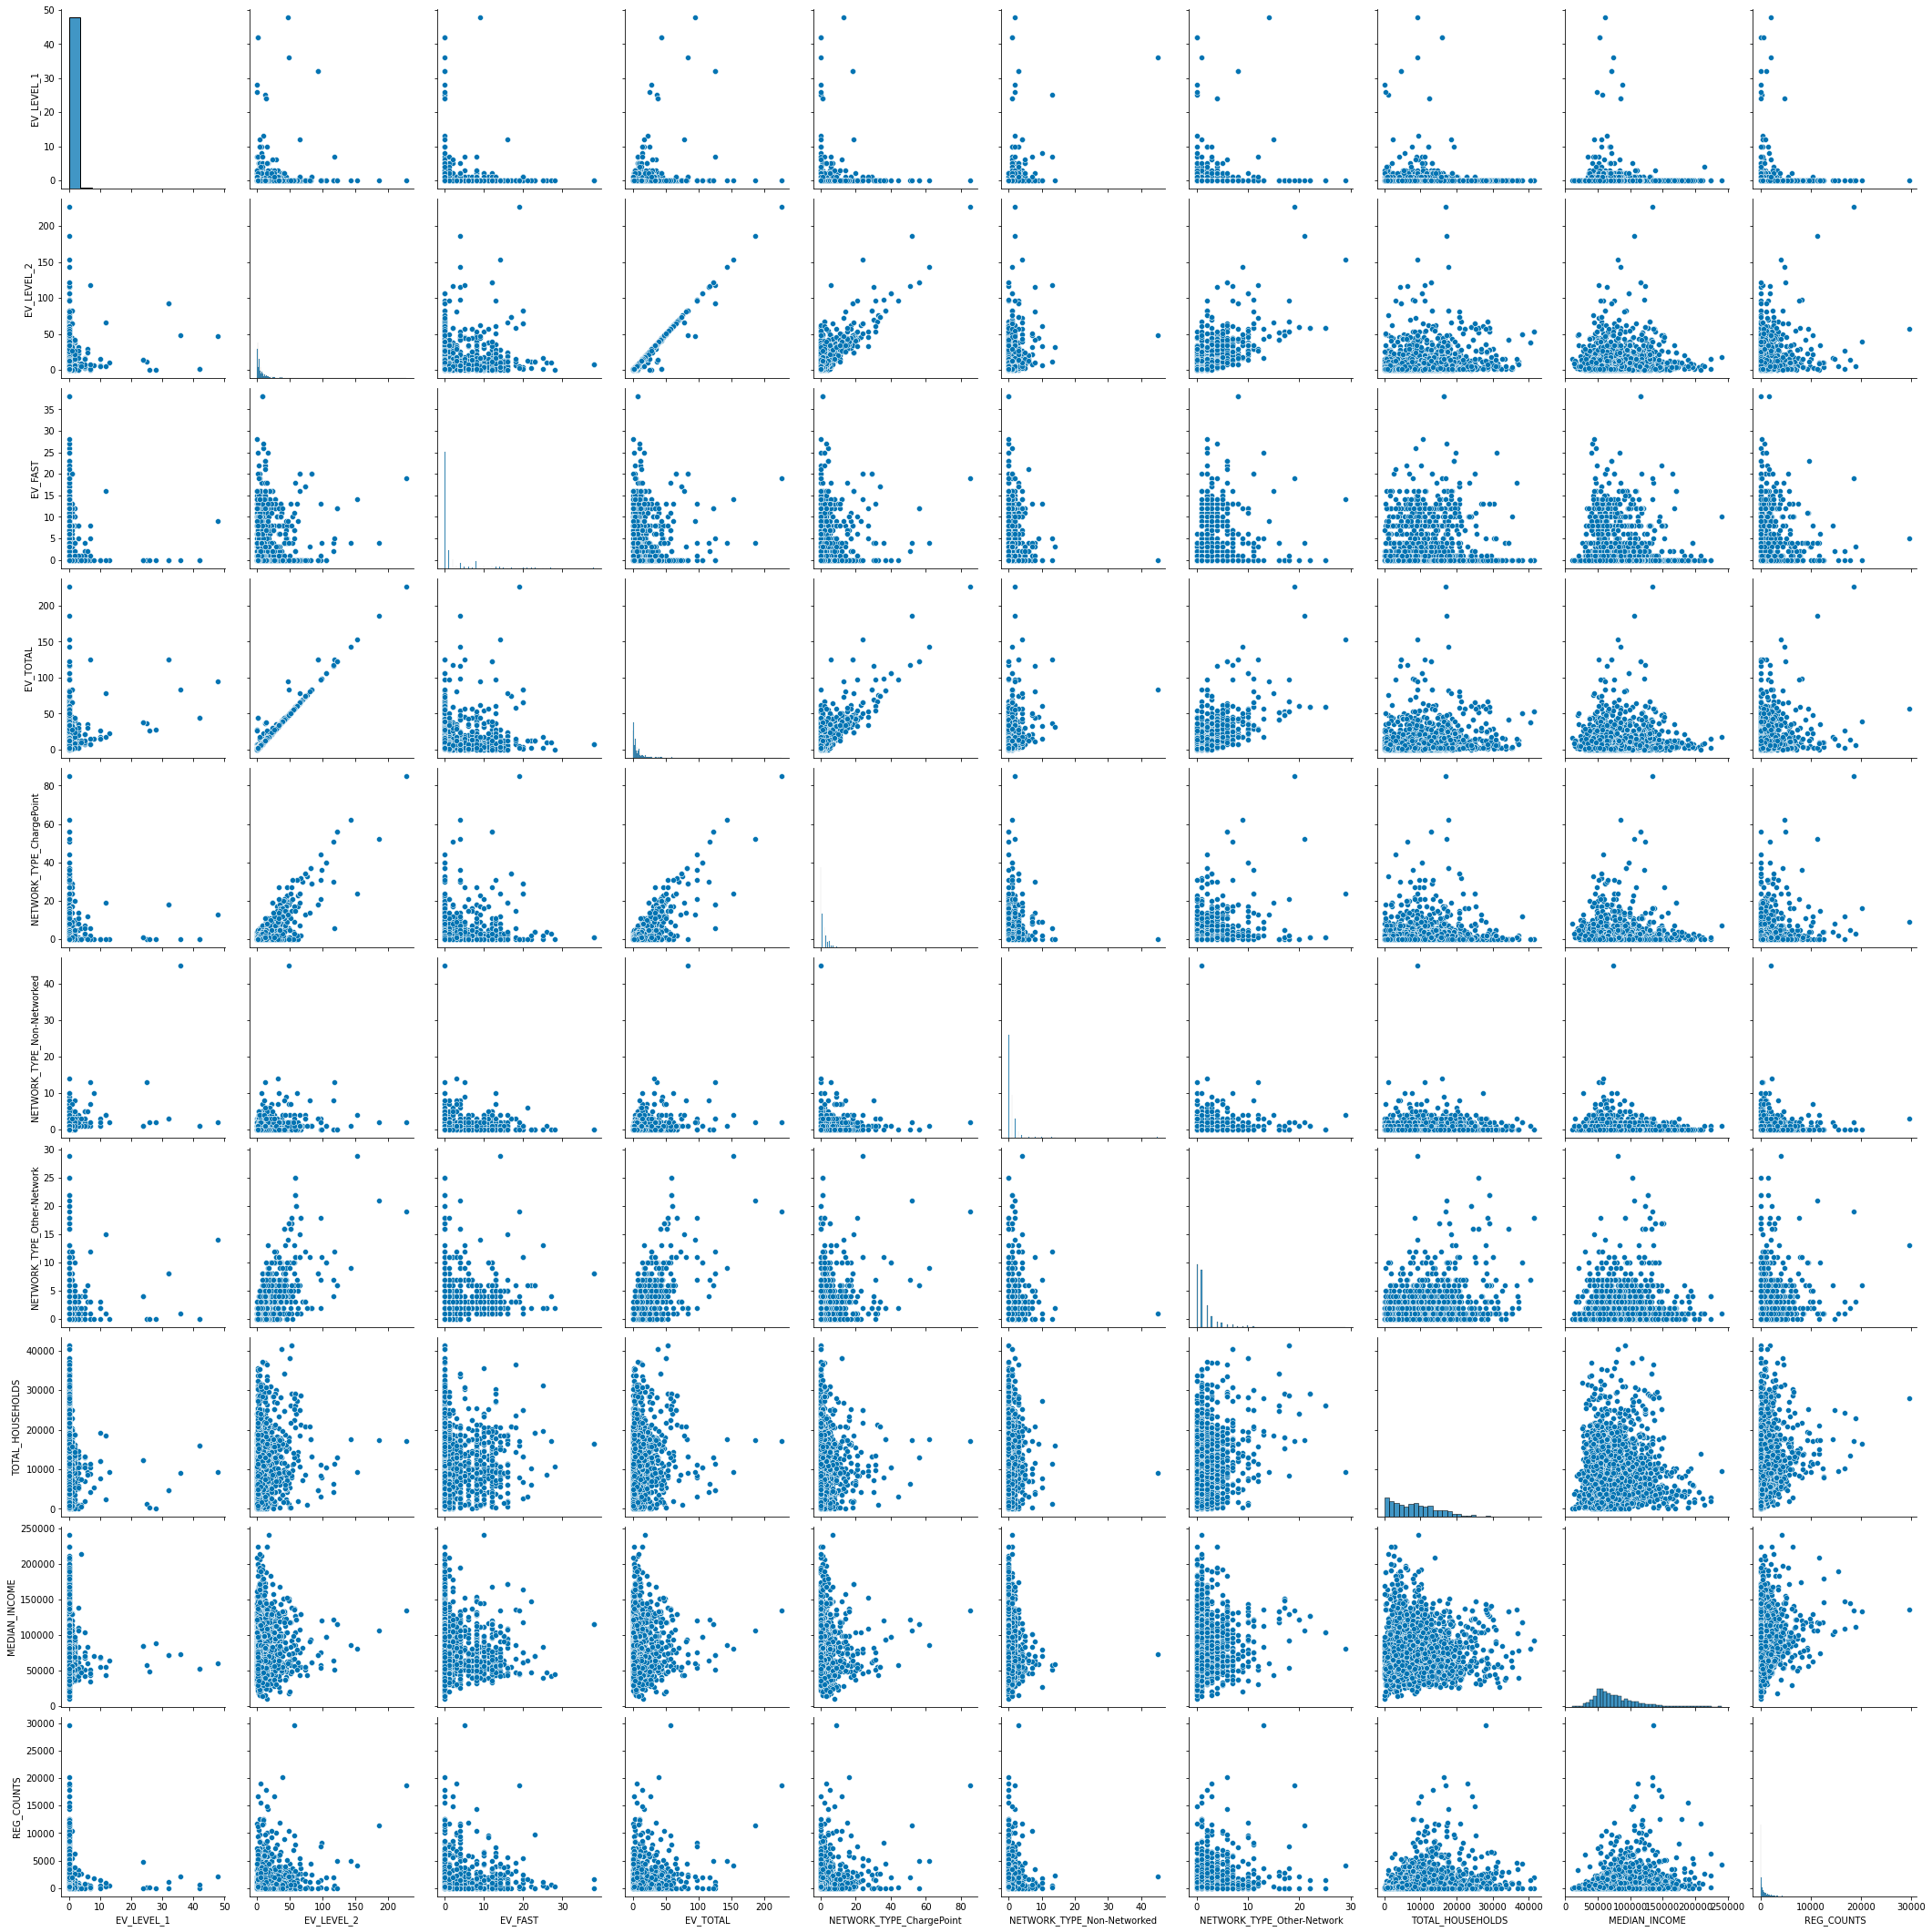

In [7]:
sns.set_palette('colorblind')
sns.pairplot(data=model_df, height=3)

In [8]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
MEDIAN_INCOME                 0.303950
EV_LEVEL_2                    0.278287
EV_TOTAL                      0.270072
TOTAL_HOUSEHOLDS              0.253630
NETWORK_TYPE_ChargePoint      0.246233
NETWORK_TYPE_Other-Network    0.239697
EV_FAST                       0.097078
NETWORK_TYPE_Non-Networked    0.030290
EV_LEVEL_1                   -0.009710
Name: REG_COUNTS, dtype: float64

# Scaling & Normalization

In [9]:
scaler = StandardScaler()

In [10]:
scaled_data = scaler.fit_transform(model_df)

In [11]:
scaled_df = pd.DataFrame(scaled_data, index=model_df.index, columns=model_df.columns)
scaled_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,-0.135309,-0.469595,-0.457078,-0.477865,-0.435402,0.201484,-0.612503,-1.188606,-0.657241,-0.454269
07001,-0.135309,-0.537720,-0.457078,-0.544325,-0.435402,0.201484,-0.612503,-0.593324,-0.179911,-0.358152
07003,-0.135309,0.211653,0.791159,0.186741,0.381220,0.201484,0.518479,1.341236,0.081511,-0.451491
07003,-0.135309,0.211653,0.791159,0.186741,0.381220,0.201484,0.518479,1.341236,0.081511,-0.012572
07004,-0.135309,-0.197096,0.291864,-0.212023,-0.435402,0.201484,0.141485,-0.935993,1.487757,-0.453714


In [12]:
y = scaled_df.REG_COUNTS
y.shape

(2939,)

In [13]:
X = scaled_df.drop(['REG_COUNTS'], axis=1)
X.shape

(2939, 9)

In [14]:
corr_matrix = scaled_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
MEDIAN_INCOME                 0.303950
EV_LEVEL_2                    0.278287
EV_TOTAL                      0.270072
TOTAL_HOUSEHOLDS              0.253630
NETWORK_TYPE_ChargePoint      0.246233
NETWORK_TYPE_Other-Network    0.239697
EV_FAST                       0.097078
NETWORK_TYPE_Non-Networked    0.030290
EV_LEVEL_1                   -0.009710
Name: REG_COUNTS, dtype: float64

# Linear Regression

In [15]:
X_scaled = scaled_df.TOTAL_HOUSEHOLDS.values.reshape(-1,1)

In [16]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [17]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(970,)


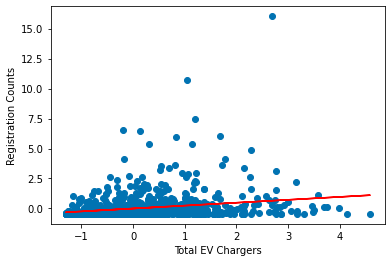

In [19]:
plt.scatter(X_test, y_test)
plt.xlabel('Total EV Chargers')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Multivariable Linear Regression

In [ ]:
multi_X = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    #'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked','NETWORK_TYPE_Other-Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME']]

# multi_X = model_df[['EV_LEVEL_2', 'EV_FAST']]

multi_X.shape

In [ ]:
# Split the data into training/testing sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, y, test_size=0.33, random_state=42)

In [ ]:
# Train the model using the training sets
multi_lin = LinearRegression()
multi_lin.fit(multi_X_train, multi_y_train)

In [ ]:
# Make predictions using the testing set
multi_y_pred = multi_lin.predict(multi_X_test)
print(multi_y_pred.shape)

# Performance

In [ ]:
print('Intercept:', multi_lin.intercept_)
print('Coefficients:', multi_lin.coef_)

In [ ]:
explained_variance_score(multi_y_test, multi_y_pred)

In [ ]:
max_error(multi_y_test, multi_y_pred)

In [ ]:
mean_absolute_error(multi_y_test, multi_y_pred)

In [ ]:
mean_squared_error(multi_y_test, multi_y_pred, squared=False)

In [ ]:
r2_score(multi_y_test, multi_y_pred)

In [ ]:
# intercept
print('Intercept:', multi_lin.intercept_)
# The coefficients
print("Coefficients: \n", multi_lin.coef_)
# explained variance score
print("Explained Variance Score: %.2f \n" % explained_variance_score(multi_y_test, multi_y_pred))
# Max Error
print("Max Error: %.2f \n" % max_error(multi_y_test, multi_y_pred))
# Mean Absolute Error
print("Mean Absolute Error: %.2f \n" % mean_absolute_error(multi_y_test, multi_y_pred))
# The mean squared error
print("Mean Squared error: %.2f \n" % mean_squared_error(multi_y_test, multi_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(multi_y_test, multi_y_pred))

#Visualizing Predictions

In [ ]:
predictions_df = pd.DataFrame(multi_y_pred, index=multi_X_test.index, columns=["REG_PREDICT"])

In [ ]:
predictions_df.head()

In [ ]:
ml_out_df = multi_X_test.merge(predictions_df, how='left', on='ZIP_CODE')

In [ ]:
ml_out_df

In [ ]:
sns.set_palette('colorblind')
sns.pairplot(data=ml_out_df, height=3)